### Antriksh Gupta - GRIPDecember22

### Importing Libraries and loading dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.info()
# there a total 5 feature which are of type "int" and "float" 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
# zero null value. 
df.shape

(9994, 13)

### Data preprocessing 

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
# number of duplicate enteries 
df.duplicated().sum()

17

In [7]:
# dropping duplicate enteries 
df.drop_duplicates(inplace = True)

In [8]:
# dropping unwanted quantities 
df.drop(["Postal Code", 'Discount'], axis = 1, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Region        9977 non-null   object 
 6   Category      9977 non-null   object 
 7   Sub-Category  9977 non-null   object 
 8   Sales         9977 non-null   float64
 9   Quantity      9977 non-null   int64  
 10  Profit        9977 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 935.3+ KB


### Getting insights from data 

Univariate Analysis

In [10]:
df["Ship Mode"].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

Text(0.5, 1.0, 'Shipping mode wise distribution of orders')

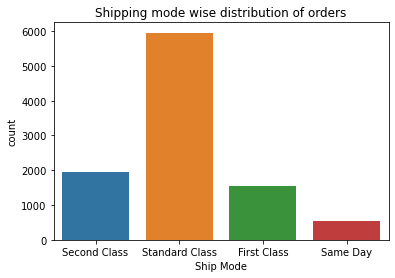

In [11]:
sns.countplot(x = df['Ship Mode'])
plt.title('Shipping mode wise distribution of orders')

In [12]:
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

Text(0.5, 1.0, 'Segmentwise distribution of orders')

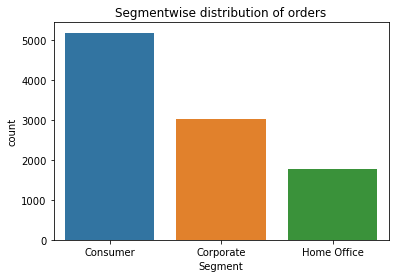

In [13]:
sns.countplot(x = df['Segment'])
plt.title('Segmentwise distribution of orders')

In [14]:
df['Country'].value_counts()
# all the orders are within the United states

United States    9977
Name: Country, dtype: int64

In [15]:
df['City'].value_counts().head(10)

New York City    914
Los Angeles      746
Philadelphia     536
San Francisco    506
Seattle          424
Houston          375
Chicago          313
Columbus         221
San Diego        170
Springfield      163
Name: City, dtype: int64

Text(0.5, 1.0, 'Top 10 Cities having most order placed')

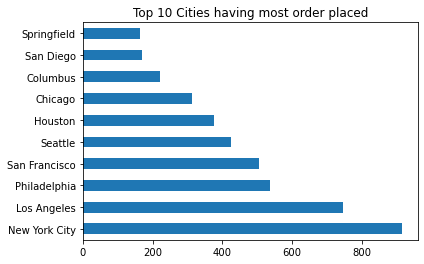

In [16]:
df['City'].value_counts().head(10).plot(kind = 'barh')
plt.title('Top 10 Cities having most order placed')

In [17]:
df['State'].value_counts().head(10)

California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: State, dtype: int64

Text(0.5, 1.0, 'State wise orders distribution')

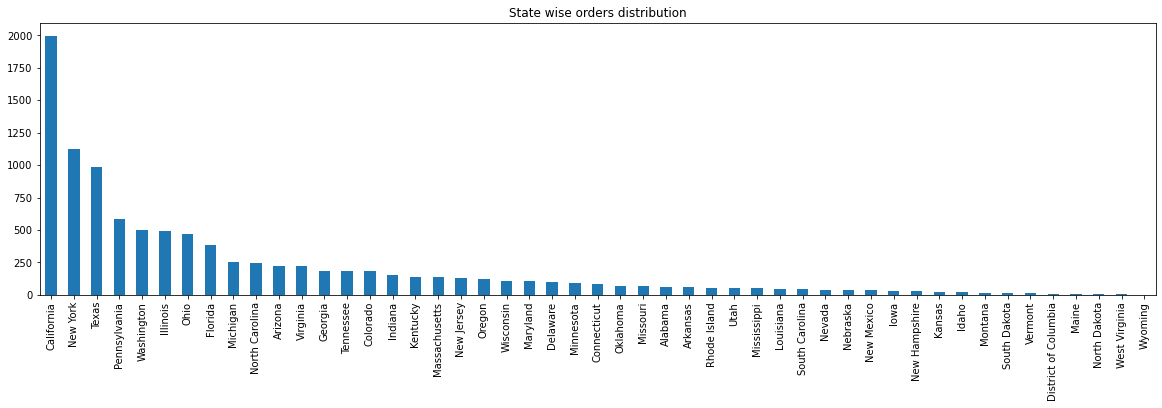

In [18]:
df['State'].value_counts().plot(kind = 'bar', figsize =[20, 5])
plt.title('State wise orders distribution')

In [19]:
df['Region'].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

Text(0.5, 1.0, 'Regionwise orders distribution')

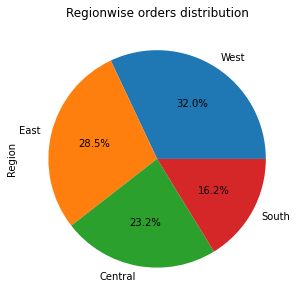

In [20]:
df['Region'].value_counts().plot(kind = 'pie', figsize=[5,5], autopct='%1.1f%%')
plt.title('Regionwise orders distribution')

In [21]:
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

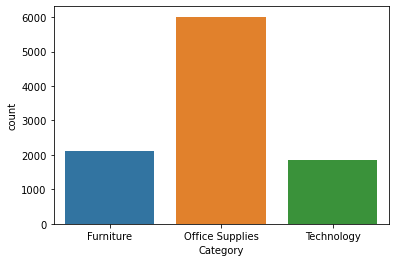

In [22]:
sns.countplot(x = df['Category'])

In [23]:
df['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

<AxesSubplot:ylabel='Sub-Category'>

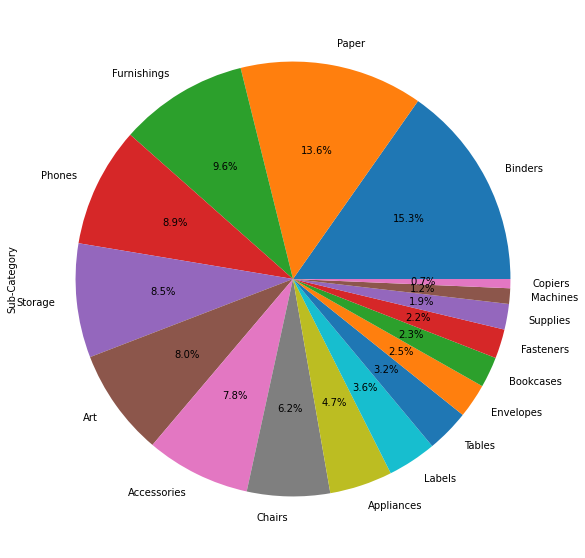

In [24]:
df['Sub-Category'].value_counts().plot(kind = 'pie', figsize = [10,10], autopct='%1.1f%%')

Bivariate Analysis

In [25]:
df.corr()

,Sales,Quantity,Profit
Sales,1.000000,0.200722,0.479067
Quantity,0.200722,1.000000,0.066211
Profit,0.479067,0.066211,1.000000


<AxesSubplot:>

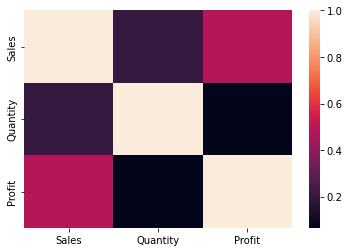

In [26]:
sns.heatmap(df.corr())

In [27]:
df.groupby("Category").sum()

,Sales,Quantity,Profit
Category,,,
Furniture,741306.3133,8020,18421.8137
Office Supplies,718735.2440,22861,122364.6608
Technology,836154.0330,6939,145454.9481


Text(0.5, 1.0, 'Sales vs Category')

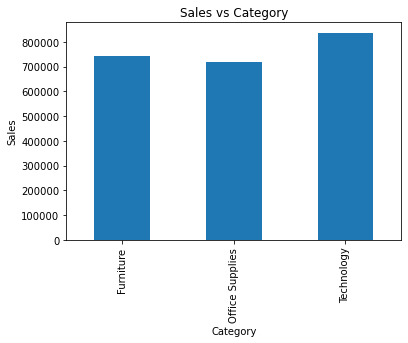

In [28]:
df.groupby("Category").sum().Sales.plot(kind = 'bar')
plt.ylabel('Sales')
plt.title('Sales vs Category')

In [29]:
df.groupby("Sub-Category").sum()

,Sales,Quantity,Profit
Sub-Category,,,
Accessories,167380.3180,2976,41936.6357
Appliances,107532.1610,1729,18138.0054
Art,27107.0320,2996,6524.6118
Binders,203409.1690,5971,30228.0003
Bookcases,114879.9963,868,-3472.5560
Chairs,327777.7610,2351,26567.1278
Copiers,149528.0300,234,55617.8249
Envelopes,16476.4020,906,6964.1767
Fasteners,3024.2800,914,949.5182


<AxesSubplot:xlabel='Sub-Category'>

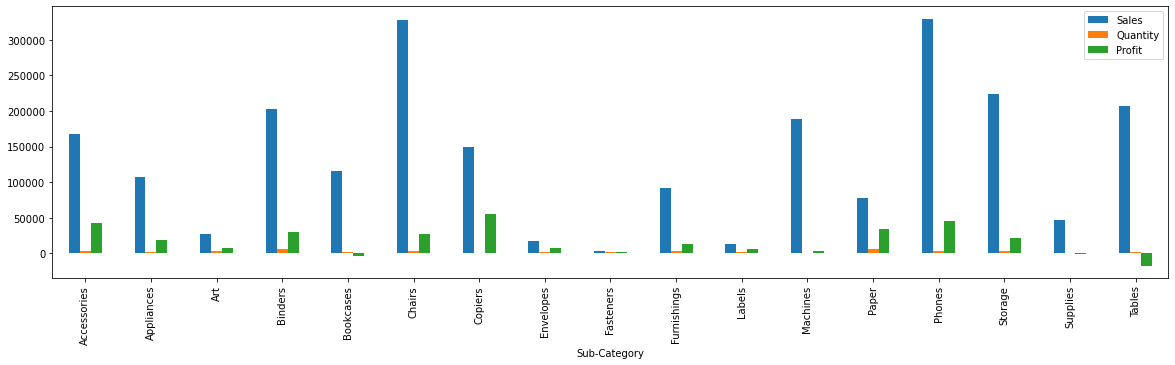

In [30]:
df.groupby("Sub-Category").sum().plot(kind = 'bar', figsize = [20,5])

In [31]:
df.groupby("Sub-Category").sum().Profit

Sub-Category
Accessories    41936.6357
Appliances     18138.0054
Art             6524.6118
Binders        30228.0003
Bookcases      -3472.5560
Chairs         26567.1278
Copiers        55617.8249
Envelopes       6964.1767
Fasteners        949.5182
Furnishings    13052.7230
Labels          5526.3820
Machines        3384.7569
Paper          33944.2395
Phones         44515.7306
Storage        21278.8264
Supplies       -1189.0995
Tables        -17725.4811
Name: Profit, dtype: float64

### Conclusions
1) Most prefered shipping mode is Standard Class

2) Most number of orders is placed in New York City

3) In terms of state, most number of orders is placed in California.

4) In terms of category, Office-supplies are ordered the most.

5) Most profitable item to company is Copiers.

6) Most selling item is Binders.